In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("rendimientosegundaversion_formateado.csv")

### Tiempo Medio por URL

In [18]:
urls = df.groupby("URL").sum()

print("MEDIA: " + str(urls.mean()["TIME"]) + " ms")
print("DESVIACION TIPICA: " + str(urls.std()["TIME"]) + " ms")

MEDIA: 7172.481356250116 ms
DESVIACION TIPICA: 7889.274592050425 ms


### Percentil 90

In [21]:
print("Percentil 90: " + str(urls.quantile(0.9)["TIME"]) + " ms")

Percentil 90: 14657.920199999999 ms


### Tiempo Medio por Secciones en Categorias

                                        TIME
SECCION                                     
Permisos                          171.346265
cacheoPreciosTime                 843.019717
carruselesGroupModeTime           617.681249
carruselesTime                    846.835811
contexTime                        465.959273
creacionResponseTime              379.373683
fechaCalculoNumeroArticulosTime   509.041286
obtencionGruposTime               119.599333
ocultarFiltrosTime                945.731206
ordenadoItemsTime                 157.264290
ordenadoTime                      163.114384
renderizadoTime                   631.886645
seleccionArticulosCarruselesTime  310.544000
serializacionCarruselesTime       150.994417
updateCacheTime                   258.858929
                                         TIME
SECCION                                      
Permisos                            13.857073
cacheoPreciosTime                 1658.134550
carruselesGroupModeTime            166.453375
carru

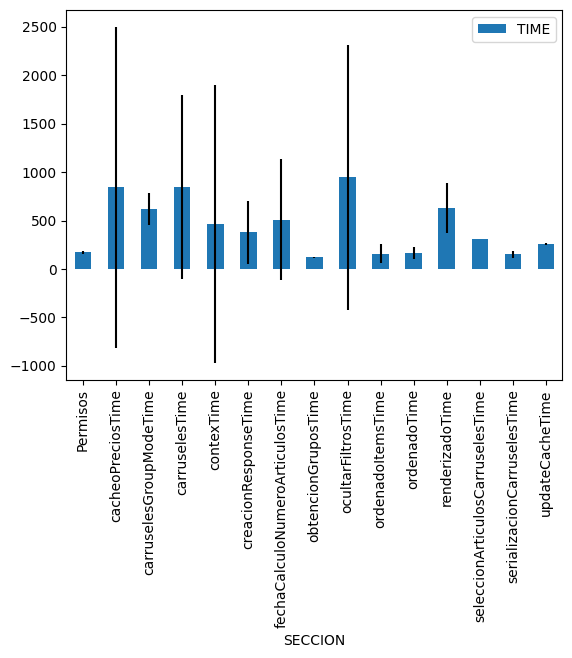

In [22]:
categoria = df[df["VISTA"] == "categoria"]

categoria_filtrado = categoria[(categoria["TIME"] > 100) & (categoria["SECCION"] != "Renderizado")]

categoria_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = categoria_filtrado.groupby("SECCION").std())

print(categoria_filtrado.groupby("SECCION").mean())
print(categoria_filtrado.groupby("SECCION").std())


### Tiempo Medio por Secciones en Grupos

                             TIME
SECCION                          
Datos                  154.928000
Permisos               136.575184
cacheoPreciosTime      303.336914
consultaArbolTime      101.414250
generacionFiltrosTime  803.243606
getObjectTime          154.758000
ordenarItemsTime       124.620526
                              TIME
SECCION                           
Datos                          NaN
Permisos                 11.320347
cacheoPreciosTime       198.456953
consultaArbolTime         1.266630
generacionFiltrosTime  1066.097919
getObjectTime                  NaN
ordenarItemsTime         17.027919


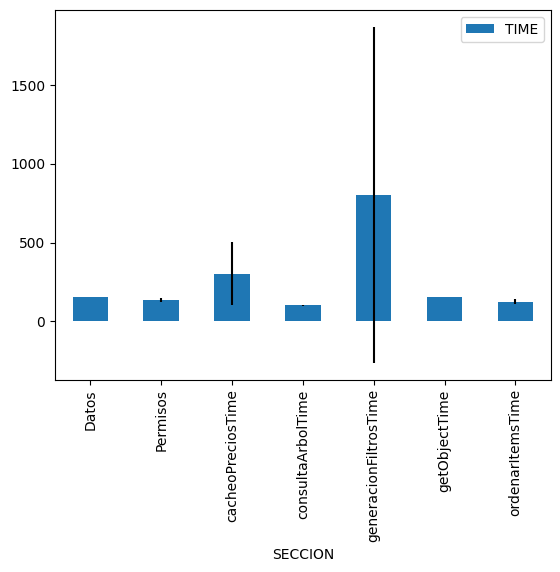

In [26]:
grupo = df[df["VISTA"] == "grupo"]

grupo_filtrado = grupo[(grupo["TIME"] > 100) & (grupo["SECCION"] != "Renderizado")]

grupo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = grupo_filtrado.groupby("SECCION").std())

print(grupo_filtrado.groupby("SECCION").mean())
print(grupo_filtrado.groupby("SECCION").std())
print(grupo[grupo["SECCION"] != "Renderizado"])

### Tiempo Medio por Secciones en Articulos

                              TIME
SECCION                           
Datos                   235.619786
Permisos                137.327524
articuloArbolTime       133.400562
atributosGrupoTime      490.082559
cachePrecioTime         155.041573
contextoTime            196.644706
generarCarruselesTime  3489.521566
                              TIME
SECCION                           
Datos                    50.275216
Permisos               1010.772697
articuloArbolTime         7.785195
atributosGrupoTime      387.881189
cachePrecioTime          44.465712
contextoTime             29.932126
generarCarruselesTime  4049.056555


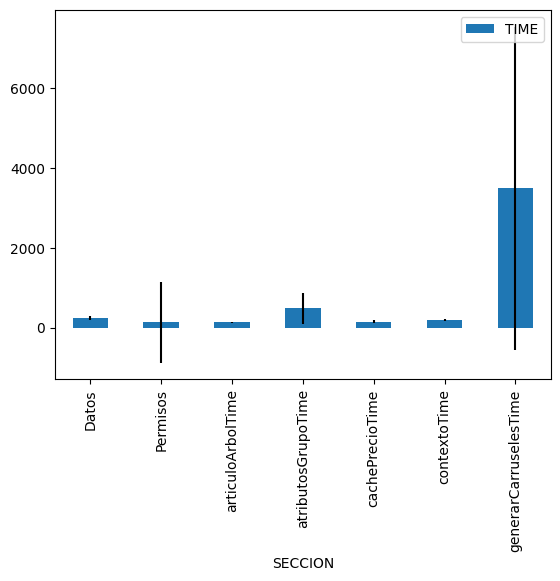

In [24]:
articulo = df[df["VISTA"] == "articulo"]

articulo_filtrado = articulo[(articulo["TIME"] > 100) & (articulo["SECCION"] != "Renderizado")]

articulo_filtrado.groupby("SECCION").mean().plot(kind = "bar", yerr = articulo_filtrado.groupby("SECCION").std())

print(articulo_filtrado.groupby("SECCION").mean())
print(articulo_filtrado.groupby("SECCION").std())

### Tiempo Medio Libra

In [16]:
libra = df[df["VISTA"] == "getDatosReferencia"]

print(libra.groupby("URL").mean())
print(libra.groupby("URL").std())

             TIME
URL              
Libra  227.087677
             TIME
URL              
Libra  185.527413
